In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import TwoBeam as tb

### Parameters

In [14]:
Span=1        # m span of two-member structure
Height=0.03   # m height at apex - analytical solution valid only for small aspect ratio
D=50          # mm CHS cross-section diameter
t=5           # mm CHS cross-section thickness
nb=10         # number of finite elements along one beam
K1=0.0001     # kNm/rad spring stiffness value - pinned
K2=54.        # kNm/rad                        - M24 linear from [Ma et at. 2011 in Journal of the IASS]
K3=200.       # kNm/rad 
K4=1e10       # kNm/rad 

TBS=tb.TwoBeamStructure(Span,Height,D,t,nb)

### Numerical solution with Opensees

In [15]:
d1, f1 = tb.Numerical(TBS, K1) # linear spring-stiffness values
d2, f2 = tb.Numerical(TBS, K2)
d3, f3 = tb.Numerical(TBS, K3)
d4, f4 = tb.Numerical(TBS, K4)

### Analytical solution

In [16]:
Ppin,Psr1,Pr,dA,PpinI,PrI=tb.Analytical(TBS,K1) # solution based on [Gidofalvy 2018 Phd dissertation]
_,Psr2,*rest=tb.Analytical(TBS,K2)
_,Psr3,*rest=tb.Analytical(TBS,K3)
_,Psr4,*rest=tb.Analytical(TBS,K4)

### Comparison of results

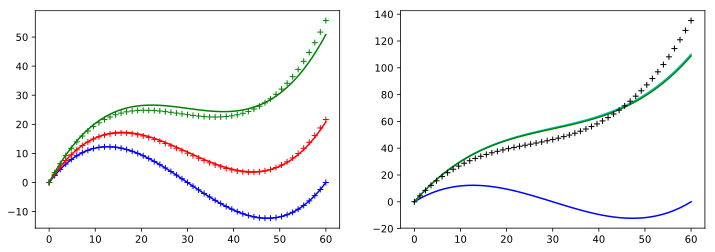

In [17]:
plt.subplots(figsize=(12, 4))
plt.subplot(121)
plt.plot(dA,Ppin,'b',d1, f1,'b+', dA,Psr2,'r',d2, f2,'r+',dA,Psr3,'g',d3, f3,'g+') #mm kN
plt.subplot(122)
_=plt.plot(dA,Ppin,'b',dA,Pr,'c',dA,Psr4,'g', d4, f4, 'k+') #mm kN
# continuous lines: analytical
# dots: numerical 

### Peak values before snap-through

In [18]:
def maxST(L,N):
    resultX=0
    resultY=0
    for x, y, a, b in zip(L, L[1:], N, N[1:]):
        if (y-x)/(b-a)<1:
            resultX=x
            resultY=y
            break
    return resultX, resultY
        
print('{:<6} kNm/rad: {:<5.1f} kN at {:<5.3f}'.format(K1,maxST(f1, dA)[0],maxST(f1, dA)[1]))
print('{:<6.0f} kNm/rad: {:<5.1f} kN at {:<5.3f}'.format(K2,maxST(f2, dA)[0],maxST(f2, dA)[1]))
if maxST(f3, dA)[0]!=0: print('{:<6.0f} kNm/rad: {:<5.1f} kN at {:<5.3f}'.format(K3,maxST(f3, dA)[0],maxST(f3, dA)[1]))
if maxST(f4, dA)[0]!=0: print('{:<6.0e} kNm/rad: {:<5.1f} kN at {:<5.3f}'.format(K4,maxST(f4, dA)[0],maxST(f4, dA)[1]))

0.0001 kNm/rad: 11.1  kN at 11.675
54     kNm/rad: 15.7  kN at 16.296
200    kNm/rad: 23.3  kN at 23.855
